# G16 data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Read in data from specified .csv file
df = pd.read_csv('New camera image data - Sheet1.csv')
data = df.values

## Comment in/out next line to see formatting of data ###
# print(df.loc[0,'Electron Energy'])

In [124]:
# print(df.loc[0,:])

In [33]:
### Constants ###
N = len(df.index)   # number of images in Powershot G16 Data
H_V_lattice = 3.493569812  #Reciprocal distance between Horizontal and Vertical Cu100 lattice points
D_lattice = 2.470326905    #Reciprocal distance between Diagonal Cu100 lattice points

In [7]:
## Data Values from dataframe ##
energy = df.loc[:,'Electron Energy']
sqrtE = np.sqrt(energy)
opening_m = df.loc[:,'Opening']
opening_m_error = np.std(opening_m)/opening_m

In [10]:
####### H V D dataframes
#select columns of interest
hcols = ['H_Xpeak_1', 'H_Half max left_1', 'H_Half max right_1', 'H_Xpeak_2', 'H_Half max left_2', 'H_Half max right_2']
vcols = ['V_Xpeak_1', 'V_Half max left_1', 'V_Half max right_1', 'V_Xpeak_2', 'V_Half max left_2', 'V_Half max right_2']
dcols = ['D_Xpeak_1', 'D_Half max left_1', 'D_Half max right_1', 'D_Xpeak_2', 'D_Half max left_2', 'D_Half max right_2']

#select wanted portions of main dataframe
H_df = df[hcols]
V_df = df[vcols]
D_df = df[dcols]

##### Only run next cell once! it fixes the first few data points

In [46]:
# D_df.loc[[0,1,2,3,4],'D_Xpeak_1'] = .5*D_df.loc[[0,1,2,3,4],'D_Xpeak_1']
# D_df.loc[[0,1,2,3,4],'D_Xpeak_2'] = .5*D_df.loc[[0,1,2,3,4],'D_Xpeak_2']
# print(D_df.loc[[0,1,2,3,4],'D_Xpeak_2'] - D_df.loc[[0,1,2,3,4], 'D_Xpeak_1'])

In [28]:
### Calculated Values ###
#Screen opening and opening error
def recip_openingANDerror(lattice, data, Opening_A, Error_opening_AU):
    spacing_AU = data.iloc[:,3] - data.iloc[:,0]         #Calculate distance between points (Right_x_position - Left_x_position)
    opening = lattice*(Opening_A/spacing_AU)   #Calculate opening size in reciprocal space (lattice spacing*(Opening[AU]/Lattice spacing[AU]))
    d_left = .5*(data.iloc[:,2] - data.iloc[:,1])        #absolute error in left point .5*(width of peak at half max)
    d_right = .5*(data.iloc[:,5] - data.iloc[:,4])       #absolute error in right point .5*(width of peak at half max)
    d_spacing = np.sqrt(np.square(d_left) + np.square(d_right))   #absolute error in spacing (addition of absolute error in quadrature)
    frac_error = np.sqrt(np.square(d_spacing/spacing_AU) + np.square(Error_opening_AU/Opening_A))   #fractional error in spacing
    error_recip = frac_error*opening           #fractional error in opening calculation
    return opening, error_recip

#least squares fit with error in slope and intercept
##details of calculation in next cell
def w_lst_sq(opening_recip, error_recip, e_energy, sqrt_e):
    weights = 1/np.square(error_recip)         #weights for line fit from error in opening
    Delta = np.sum(weights)*np.sum(weights*e_energy)-np.square(np.sum(weights*sqrt_e))
    intercept = ((np.sum(weights*e_energy)*np.sum(weights*opening_recip))
                 -(np.sum(weights*sqrt_e)*np.sum(weights*sqrt_e*opening_recip)))/Delta
    slope = (np.sum(weights)*np.sum(weights*sqrt_e*opening_recip)-np.sum(weights*sqrt_e)*np.sum(weights*opening_recip))/Delta
    intercept_error = np.sqrt(np.sum(weights*e_energy)/Delta)
    slope_error = np.sqrt(np.sum(weights)/Delta)
    return slope, slope_error, intercept, intercept_error

$$ B = \frac{\sum{w  E} \sum{w  o} - \sum w\sqrt{E} \sum w o \sqrt{E} }{\Delta} $$

$$ A = \frac{\sum{w} \sum{w o \sqrt{E}}-\sum{w\sqrt e} \sum{w o}}{\Delta} $$

Where 
$$ \Delta = \sum{w} \sum{w E}- (\sum w\sqrt{e})^2 $$
And 
$$ Y = Ax + B $$

In [58]:
H_recip_opening, H_opening_error = recip_openingANDerror(H_V_lattice, H_df, opening_m, opening_m_error)
H_slope, H_slope_error, H_intercept, H_intercept_error = w_lst_sq(H_recip_opening, H_opening_error, energy, sqrtE)
print('H Slope + error', H_slope, H_slope_error, 'Intercept + error:', H_intercept, H_intercept_error)

V_recip_opening, V_opening_error = recip_openingANDerror(H_V_lattice, V_df, opening_m, opening_m_error)
V_slope, V_slope_error, V_intercept, V_intercept_error = w_lst_sq(V_recip_opening, V_opening_error, energy, sqrtE)
print('V Slope + error', V_slope, V_slope_error, 'Intercept + error:', V_intercept, V_intercept_error)

D_recip_opening, D_opening_error = recip_openingANDerror(D_lattice, D_df, opening_m, opening_m_error)
D_slope, D_slope_error, D_intercept, D_intercept_error = w_lst_sq(D_recip_opening, D_opening_error, energy, sqrtE)
print('D Slope + error', D_slope, D_slope_error, 'Intercept + error:', D_intercept, D_intercept_error)

H Slope + error 0.7702071387066763 0.03752820129150288 Intercept + error: 0.5130240351966252 0.3349668602467557
V Slope + error 0.7650675038207839 0.04814540132896146 Intercept + error: 0.6314761751409919 0.43293008006211614
D Slope + error 0.7776123059603269 0.05714997235386788 Intercept + error: 0.498209224988452 0.5071268144172828


# Old camera data

In [193]:
#Read in data from old camera, same format as above
df2 = pd.read_csv('Old Camera image data - Sheet1.csv')
data2 = df2.values

In [213]:
### Data Values ###
#all values same format as above
N2 = len(df2.index)
energy2 = df2.loc[:,'Electron Energy']
sqrtE2 = np.sqrt(energy2)
opening_m2 = df2.loc[:,'Opening']
opening_m_error2 = np.std(opening_m2)/opening_m2

### Sections of data
H_df2 = df2[hcols]
# print(H_data[0,:])
V_df2 = df2[vcols]
# print(V_data[:,3])
D_df2 = df2[dcols]
# print(D_df2.loc[0][:])

In [216]:
# Only run this cell once!
# D_df2.loc[[0,1,2,3,4],'D_Xpeak_1'] = .5*D_df2.loc[[0,1,2,3,4],'D_Xpeak_1']
# D_df2.loc[[0,1,2,3,4],'D_Xpeak_2'] = .5*D_df2.loc[[0,1,2,3,4],'D_Xpeak_2']

## Spacing calculations

In [137]:
#Calculate reciprocal spacing between measured points using fit line
def spacing_calc(energy, meas_opening, data):
    meas_spacing = data.iloc[:,3] - data.iloc[:,0]
    ratio = meas_spacing/meas_opening
    direction = str(input('Which direction? H/V/D (case sensitive)'))
    if direction == 'H':
        opening_func = 0.7707384404775303*np.sqrt(energy) + 0.507881158392666
    elif direction == 'V':
        opening_func = 0.7635937144289188*np.sqrt(energy) + 0.6470749251271875
    elif direction == 'D':
        opening_func = 0.7781788677967666*np.sqrt(energy) + 0.4939931209205846
    else:
        print('Please re-run cell and select a valid direction')
    
    spacing = ratio*opening_func
    return spacing

In [125]:
# print(H_df.loc[0,:])

In [206]:
# H fits
HH1_spacing = spacing_calc(energy, opening_m, H_df)
HV1_spacing = spacing_calc(energy, opening_m, V_df)
HD1_spacing = spacing_calc(energy, opening_m, D_df)
HH2_spacing = spacing_calc(energy2, opening_m2, H_df2)
HV2_spacing = spacing_calc(energy2, opening_m2, V_df2)
HD2_spacing = spacing_calc(energy2, opening_m2, D_df2)

Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H


In [207]:
# V fits
VH1_spacing = spacing_calc(energy, opening_m, H_df)
VV1_spacing = spacing_calc(energy, opening_m, V_df)
VD1_spacing = spacing_calc(energy, opening_m, D_df)
VH2_spacing = spacing_calc(energy2, opening_m2, H_df2)
VV2_spacing = spacing_calc(energy2, opening_m2, V_df2)
VD2_spacing = spacing_calc(energy2, opening_m2, D_df2)

Which direction? H/V/D (case sensitive)V
Which direction? H/V/D (case sensitive)V
Which direction? H/V/D (case sensitive)V
Which direction? H/V/D (case sensitive)V
Which direction? H/V/D (case sensitive)V
Which direction? H/V/D (case sensitive)V


In [208]:
# D fits
DH1_spacing = spacing_calc(energy, opening_m, H_df)
DV1_spacing = spacing_calc(energy, opening_m, V_df)
DD1_spacing = spacing_calc(energy, opening_m, D_df)
DH2_spacing = spacing_calc(energy2, opening_m2, H_df2)
DV2_spacing = spacing_calc(energy2, opening_m2, V_df2)
DD2_spacing = spacing_calc(energy2, opening_m2, D_df2)

Which direction? H/V/D (case sensitive)D
Which direction? H/V/D (case sensitive)D
Which direction? H/V/D (case sensitive)D
Which direction? H/V/D (case sensitive)D
Which direction? H/V/D (case sensitive)D
Which direction? H/V/D (case sensitive)D


## Error calculations

In [142]:
#Calculate spacing between measured points in Arbitrary Units and fractional error
def spacing_AU(data):  
    meas_spacing = data.iloc[:,3] - data.iloc[:,0]
    spacing_frac_error = np.sqrt(np.square(.5*(data.iloc[:,2] - data.iloc[:,1]))
                                 + np.square(.5*(data.iloc[:,5] - data.iloc[:,4])))/meas_spacing
    return meas_spacing, spacing_frac_error

#Fractional error in line fit parameters A and B
def frac_axb(A, d_A, B, d_B, sqrt_e):
    frac = np.sqrt(np.square(sqrt_e*d_A) + np.square(d_B))/(A*sqrt_e + B)
    return frac

#Calculate fractional error in opening calculation from line fit
def frac_error(frac_ab, frac_open, data): 
    meas_spacing = data.iloc[:,3] - data.iloc[:,0]
    spacing_frac_error = np.sqrt(np.square(.5*(data.iloc[:,2] - data.iloc[:,1])) + np.square(.5*(data.iloc[:,5] - data.iloc[:,4])))/meas_spacing
    tot_frac_error = np.sqrt(np.square(frac_ab) + np.square(frac_open) + np.square(spacing_frac_error))
    return tot_frac_error

In [209]:
#Fractional uncertainties in each line fit
H_frac_axb = frac_axb(H_slope, H_slope_error, H_intercept, H_intercept_error, sqrtE)
V_frac_axb = frac_axb(V_slope, V_slope_error, V_intercept, V_intercept_error, sqrtE)
D_frac_axb = frac_axb(D_slope, D_slope_error, D_intercept, D_intercept_error, sqrtE)

H2_frac_axb = frac_axb(H_slope, H_slope_error, H_intercept, H_intercept_error, sqrtE2)
V2_frac_axb = frac_axb(V_slope, V_slope_error, V_intercept, V_intercept_error, sqrtE2)
D2_frac_axb = frac_axb(D_slope, D_slope_error, D_intercept, D_intercept_error, sqrtE2)

#Total fractional error
HH1_frac_error = frac_error(H_frac_axb, opening_m_error, H_df)
HV1_frac_error = frac_error(H_frac_axb, opening_m_error, V_df)
HD1_frac_error = frac_error(H_frac_axb, opening_m_error, D_df)
HH2_frac_error = frac_error(H2_frac_axb, opening_m_error2, H_df2)
HV2_frac_error = frac_error(H2_frac_axb, opening_m_error2, V_df2)
HD2_frac_error = frac_error(H2_frac_axb, opening_m_error2, D_df2)

VH1_frac_error = frac_error(V_frac_axb, opening_m_error, H_df)
VV1_frac_error = frac_error(V_frac_axb, opening_m_error, V_df)
VD1_frac_error = frac_error(V_frac_axb, opening_m_error, D_df)
VH2_frac_error = frac_error(V2_frac_axb, opening_m_error2, H_df2)
VV2_frac_error = frac_error(V2_frac_axb, opening_m_error2, V_df2)
VD2_frac_error = frac_error(V2_frac_axb, opening_m_error2, D_df2)

DH1_frac_error = frac_error(D_frac_axb, opening_m_error, H_df)
DV1_frac_error = frac_error(D_frac_axb, opening_m_error, V_df)
DD1_frac_error = frac_error(D_frac_axb, opening_m_error, D_df)
DH2_frac_error = frac_error(D2_frac_axb, opening_m_error2, H_df2)
DV2_frac_error = frac_error(D2_frac_axb, opening_m_error2, V_df2)
DD2_frac_error = frac_error(D2_frac_axb, opening_m_error2, D_df2)

#Total absolute error in reciprocal spacing
HH1_error = HH1_frac_error*HH1_spacing
HV1_error = HV1_frac_error*HV1_spacing
HD1_error = HD1_frac_error*HD1_spacing
HH2_error = HH2_frac_error*HH2_spacing
HV2_error = HV2_frac_error*HV2_spacing
HD2_error = HD2_frac_error*HD2_spacing

VH1_error = VH1_frac_error*VH1_spacing
VV1_error = VV1_frac_error*VV1_spacing
VD1_error = VD1_frac_error*VD1_spacing
VH2_error = VH2_frac_error*VH2_spacing
VV2_error = VV2_frac_error*VV2_spacing
VD2_error = VD2_frac_error*VD2_spacing

DH1_error = DH1_frac_error*DH1_spacing
DV1_error = DV1_frac_error*DV1_spacing
DD1_error = DD1_frac_error*DD1_spacing
DH2_error = DH2_frac_error*DH2_spacing
DV2_error = DV2_frac_error*DV2_spacing
DD2_error = DD2_frac_error*DD2_spacing

In [202]:
print(V_df2.loc[13])

V_Xpeak_1             0.0252
V_Half max left_1     0.0129
V_Half max right_1    0.0370
V_Xpeak_2             0.4580
V_Half max left_2     0.4500
V_Half max right_2    0.4700
Name: 13, dtype: float64


In [217]:
#drop nan rows
HD2_spacing.dropna(inplace=True)
VD2_spacing.dropna(inplace=True)
DD2_spacing.dropna(inplace=True)

HH2_error.dropna(inplace=True)
HV2_error.dropna(inplace=True)
HD2_error.dropna(inplace=True)
VH2_error.dropna(inplace=True)
VV2_error.dropna(inplace=True)
VD2_error.dropna(inplace=True)
DH2_error.dropna(inplace=True)
DV2_error.dropna(inplace=True)
DD2_error.dropna(inplace=True)

# Plot theoretical spacing vs energy
### for old camera data using new camera line fit

ValueError: x and y must be the same size

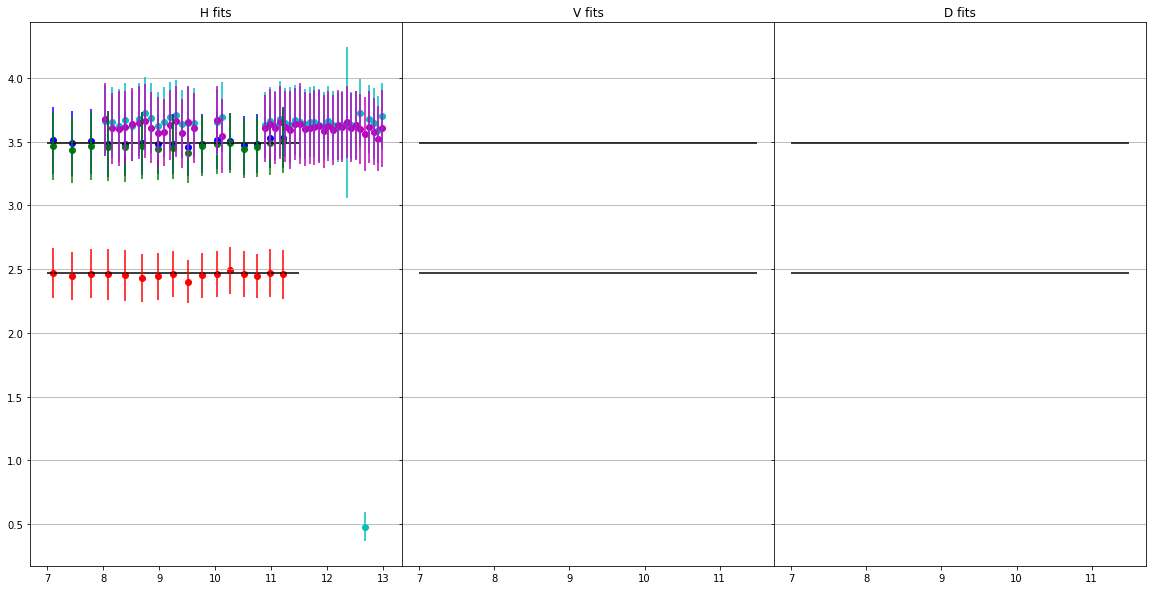

In [218]:
#Compare all plots in a row
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=True)

#figure settings
f.set_figheight(10)
f.set_figwidth(20)
f.subplots_adjust(wspace=0)

#subplot settings
ax1.set_title('H fits')
ax1.grid(which='major', axis='y')
ax2.set_title('V fits')
ax2.grid(which='major', axis='y')
ax3.set_title('D fits')
ax3.grid(which='major', axis='y')

#add horizontal lines on all 3 subplots
ax1.hlines(H_V_lattice, 7, 11.5)
ax1.hlines(D_lattice, 7, 11.5)
ax2.hlines(H_V_lattice, 7, 11.5)
ax2.hlines(D_lattice, 7, 11.5)
ax3.hlines(H_V_lattice, 7, 11.5)
ax3.hlines(D_lattice, 7, 11.5)

# Compare data sets using H fit
ax1.scatter(x1, HH1_spacing, label='HH1', color='b')
ax1.errorbar(x1, HH1_spacing, yerr=HH1_error, ls='none', color='b')
ax1.scatter(x1, HV1_spacing, label='HV1', color='g')
ax1.errorbar(x1, HV1_spacing, yerr=HV1_error, ls='none', color='g')
ax1.scatter(x1, HD1_spacing, label='HD1', color='r')
ax1.errorbar(x1, HD1_spacing, yerr=HD1_error, ls='none', color='r')

ax1.scatter(x2, HH2_spacing, label='HH2', color='c')
ax1.errorbar(x2, HH2_spacing, yerr=HH2_error, ls='none', color='c')
ax1.scatter(x2, HV2_spacing, label='HV2', color='m')
ax1.errorbar(x2, HV2_spacing, yerr=HV2_error, ls='none', color='m')
ax1.scatter(x2, HD2_spacing, label='HD2', color='y')
ax1.errorbar(x2, HD2_spacing, yerr=HD2_error, ls='none', color='y')

# Compare data sets using V fit
ax2.scatter(x1, VH1_spacing, label='VH1', color='b')
ax2.errorbar(x1, VH1_spacing, yerr=VH1_error, ls='none', color='b')
ax2.scatter(x1, VV1_spacing, label='VV1', color='g')
ax2.errorbar(x1, VV1_spacing, yerr=VV1_error, ls='none', color='g')
ax2.scatter(x1, VD1_spacing, label='VD1', color='r')
ax2.errorbar(x1, VD1_spacing, yerr=VD1_error, ls='none', color='r')

ax2.scatter(x2, VH2_spacing, label='VH2', color='c')
ax2.errorbar(x2, VH2_spacing, yerr=VH2_error, ls='none', color='c')
ax2.scatter(x2, VV2_spacing, label='VV2', color='m')
ax2.errorbar(x2, VV2_spacing, yerr=VV2_error, ls='none', color='m')
ax2.scatter(x2, VD2_spacing, label='VD2', color='y')
ax2.errorbar(x2, VD2_spacing, yerr=VD2_error, ls='none', color='y')

# Compare data sets using D fit
ax3.scatter(x1, DH1_spacing, label='DH1', color='b')
ax3.errorbar(x1, DH1_spacing, yerr=DH1_error, ls='none', color='b')
ax3.scatter(x1, DV1_spacing, label='DV1', color='g')
ax3.errorbar(x1, DV1_spacing, yerr=DV1_error, ls='none', color='g')
ax3.scatter(x1, DD1_spacing, label='DD1', color='r')
ax3.errorbar(x1, DD1_spacing, yerr=DD1_error, ls='none', color='r')

ax3.scatter(x2, DH2_spacing, label='DH2', color='c')
ax3.errorbar(x2, DH2_spacing, yerr=DH2_error, ls='none', color='c')
ax3.scatter(x2, DV2_spacing, label='DV2', color='m')
ax3.errorbar(x2, DV2_spacing, yerr=DV2_error, ls='none', color='m')
ax3.scatter(x2, DD2_spacing, label='DD2', color='y')
ax3.errorbar(x2, DD2_spacing, yerr=DD2_error, ls='none', color='y')


ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')